In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [2]:
# fetch backend
backend = Aer.get_backend('statevector_simulator')

In [3]:
# import modules
import requests
from pathlib import Path
import os


directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)
  
helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)



Module: modules/quantum_hardware_circuits.py already exists. Skipping...
Module: modules/experiment_utils.py already exists. Skipping...


In [4]:
from modules.experiment_utils import ideal_qc_simulation,plot_block_sphere
from modules.quantum_hardware_circuits import qmux,qdemux

# Quantum Multiplexer

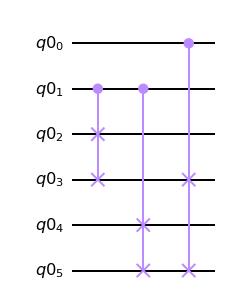

In [5]:
qmux_q = QuantumRegister(6)
q_mux_template = QuantumCircuit(qmux_q)
q_mux_template.cswap(qmux_q[1],qmux_q[2],qmux_q[3])
q_mux_template.cswap(qmux_q[1],qmux_q[4],qmux_q[5])
q_mux_template.cswap(qmux_q[0],qmux_q[3],qmux_q[5])
q_mux_template.draw("mpl")

In [6]:
qmux_gate = q_mux_template.to_gate(label = "qmux")

In [7]:
# experiment circuit 
exp1_qr = QuantumRegister(6)
exp1_cr = ClassicalRegister(6)
exp1_qc = QuantumCircuit(exp1_qr,exp1_cr)

In [8]:
# initial demo conditions
exp1_qc.x(exp1_qr[0])
exp1_qc.x(exp1_qr[1])
exp1_qc.x(exp1_qr[4])
exp1_qc.barrier()


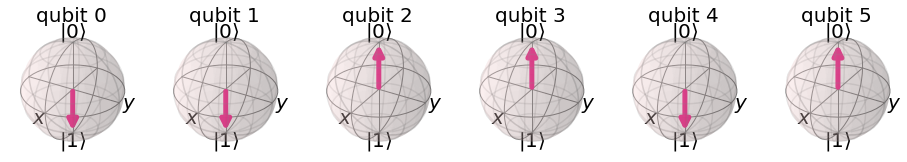

In [9]:
plot_bloch_multivector(execute(exp1_qc,backend).result().get_statevector())

In [10]:
qmux = qmux().to_gate(label = "qmux")
exp1_qc.append(qmux,exp1_qr)
exp1_qc.barrier()

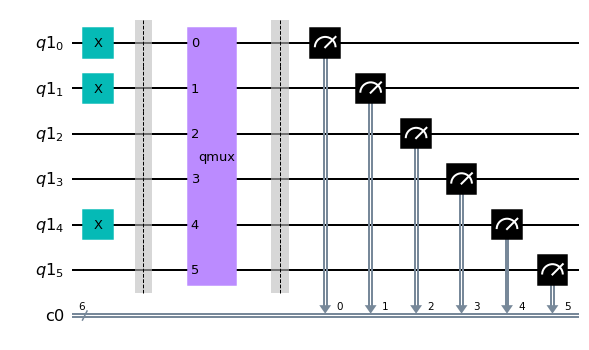

In [11]:
# maesurements 
for i in range(6):
  exp1_qc.measure(exp1_qr[i],exp1_cr[i])
exp1_qc.draw("mpl")

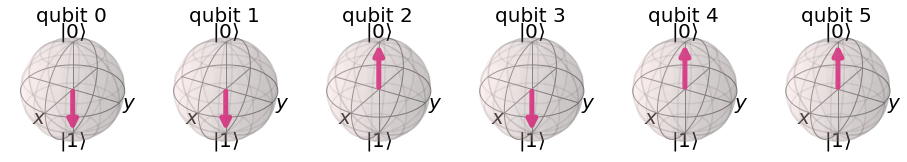

In [12]:
plot_bloch_multivector(execute(exp1_qc,backend).result().get_statevector())

In [13]:
results = ideal_qc_simulation(exp1_qc,backend)

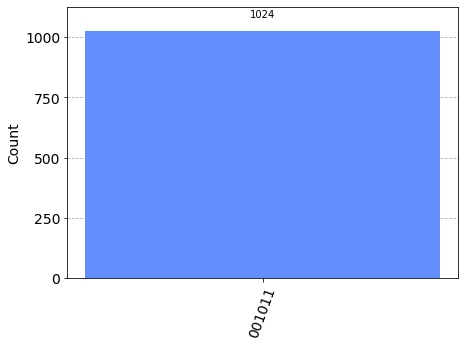

In [14]:
plot_histogram(results)

# Quantum Demultiplexer

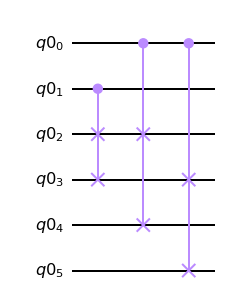

In [15]:
qdemux_q = QuantumRegister(6)
q_demux_template = QuantumCircuit(qmux_q)
q_demux_template.cswap(qmux_q[1],qmux_q[2],qmux_q[3])
q_demux_template.cswap(qmux_q[0],qmux_q[2],qmux_q[4])
q_demux_template.cswap(qmux_q[0],qmux_q[3],qmux_q[5])
q_demux_template.draw("mpl")

In [16]:
qdemux_gate = q_demux_template.to_gate(label = "qdemux")

In [17]:
# experiment circuit 
exp2_qr = QuantumRegister(6)
exp2_cr = ClassicalRegister(6)
exp2_qc = QuantumCircuit(exp2_qr,exp2_cr)

In [18]:
# initial demo conditions
exp2_qc.x(exp2_qr[0])
exp2_qc.x(exp2_qr[1])
exp2_qc.x(exp2_qr[2])
exp2_qc.barrier()

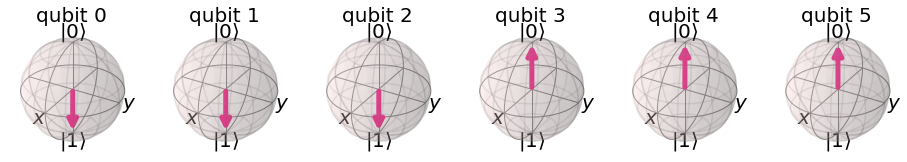

In [19]:
plot_bloch_multivector(execute(exp2_qc,backend).result().get_statevector())

In [20]:
from modules.quantum_hardware_circuits import qmux,qdemux

In [21]:
qdemux = qdemux().to_gate(label = "qdemux")
exp2_qc.append(qdemux,exp2_qr)
exp2_qc.barrier()

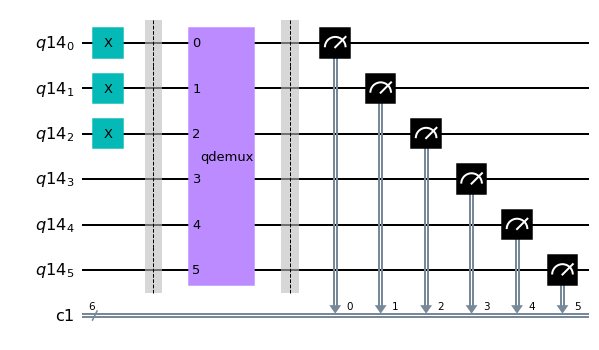

In [22]:
for i in range(6):
  exp2_qc.measure(exp2_qr[i],exp2_cr[i])
exp2_qc.draw("mpl")

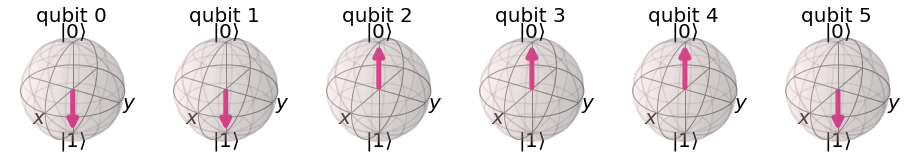

In [23]:
plot_bloch_multivector(execute(exp2_qc,backend).result().get_statevector())

In [24]:
results = ideal_qc_simulation(exp2_qc,backend)

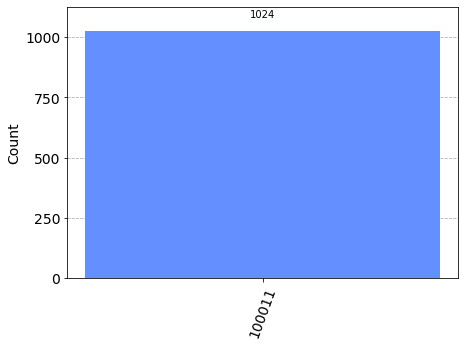

In [25]:
plot_histogram(results)